# <div style="text-align: center; color: cyan">Model and Transfer Learning</div>

## <div style="text-align: center; color: lime">Setup</div>

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

## <div style="text-align: center; color: lime">Imports</div>

In [24]:
from pathlib import Path

from matplotlib import pyplot as plt

import torch
from torch.utils.data import random_split, DataLoader

from torchvision.datasets import ImageFolder
from torchvision import transforms

import keras
from keras import layers
from keras.applications import MobileNetV2

import kagglehub


## <div style="text-align: center; color: lime">Load the data</div>

In [3]:
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

data_path = Path(path) / "tom_and_jerry/tom_and_jerry"

trs = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ]
)

all_data = ImageFolder(data_path, transform=trs)

g1 = torch.Generator().manual_seed(20)
train_data, val_data, test_data = random_split(all_data, [0.7, 0.2, 0.1], g1)

train_loader = DataLoader(train_data, batch_size=12, shuffle=True)
val_loader = DataLoader(val_data, batch_size=12, shuffle=False)
test_loader = DataLoader(test_data, batch_size=12, shuffle=False)


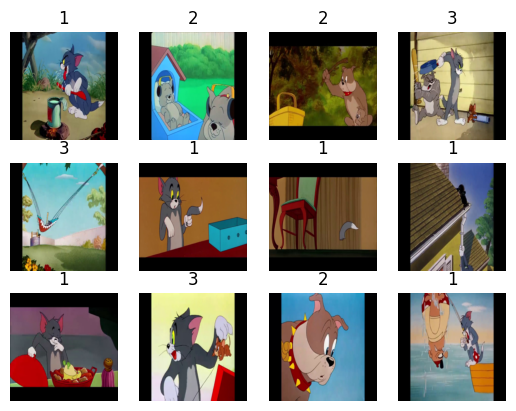

In [4]:
fig, axes = plt.subplots(3, 4)

axes_ravel = axes.ravel()

for images, labels in train_loader:
    for i, (image, label) in enumerate(zip(images, labels)):
        axes_ravel[i].imshow(transforms.ToPILImage()(image))
        axes_ravel[i].set_axis_off()
        axes_ravel[i].set_title(f"{label}")
    break

## <div style="text-align: center; color: lime">Keras Sequential</div>

In [7]:
model = keras.Sequential(
    [
    ],
)

## <div style="text-align: center; color: lime">Input Layer</div>

In [6]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(3, 224, 224)),
    ],
)

## <div style="text-align: center; color: lime">Output Layer</div>

In [8]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(3, 224, 224)),
        keras.layers.Dense(4, activation="softmax"),
    ],
)


## <div style="text-align: center; color: lime">Flatten</div>

In [16]:
model = keras.Sequential(
    [
        layers.Input(shape=(3, 224, 224)),
        layers.Flatten(),
        layers.Dense(4, activation="softmax"),
    ]
)

## <div style="text-align: center; color: lime">Compile</div>

In [17]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


## <div style="text-align: center; color: lime">Model details</div>

In [18]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       602,116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,116 (2.30 MB)

 Trainable params: 602,116 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
for images, labels in train_loader:
    result = model(images)
    print(result.shape)
    break


torch.Size([12, 4])


## <div style="text-align: center; color: lime">Train the model</div>

In [22]:
history = model.fit(train_loader, epochs=5, validation_data=val_loader)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.3541 - loss: 10.4094 - val_accuracy: 0.3449 - val_loss: 10.5623
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.3541 - loss: 10.4082 - val_accuracy: 0.3449 - val_loss: 10.5622
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.3541 - loss: 10.4050 - val_accuracy: 0.3449 - val_loss: 10.5620
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.3541 - loss: 10.4002 - val_accuracy: 0.3449 - val_loss: 10.5619
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.3546 - loss: 10.3965 - val_accuracy: 0.3449 - val_loss: 10.5618


## <div style="text-align: center; color: lime">Evaluate the model</div>

In [23]:
loss, accuracy = model.evaluate(test_loader)

print("loss:", loss)
print("accuracy:", accuracy)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3638 - loss: 10.2543
loss: 10.254292488098145
accuracy: 0.36380255222320557


## <div style="text-align: center; color: lime">Transfer Learning</div>

In [25]:
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

### <div style="text-align: center; color: lightsalmon">Permute layer</div>

In [28]:
p = layers.Permute((2, 3, 1))

for images, labels in train_loader:
    print(f"result shape: {p(images).shape}")
    break

result shape: torch.Size([12, 224, 224, 3])


### <div style="text-align: center; color: lightsalmon">Apply Transfer learning</div>

In [30]:
model = keras.Sequential(
    [
        layers.Input(shape=(3, 224, 224)),
        layers.Permute((2, 3, 1)),
        base_model,
        layers.Flatten(),
        layers.Dense(4, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [31]:
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ permute_3 (Permute)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │       250,884 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,508,868 (9.57 MB)

 Trainable params: 250,884 (980.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [32]:
history = model.fit(train_loader, epochs=5, validation_data=val_loader)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.3252 - loss: 10.4311 - val_accuracy: 0.4133 - val_loss: 8.8533
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.4383 - loss: 8.7707 - val_accuracy: 0.4434 - val_loss: 8.7051
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.4634 - loss: 8.3851 - val_accuracy: 0.4653 - val_loss: 8.2721
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step - accuracy: 0.5014 - loss: 7.8171 - val_accuracy: 0.5046 - val_loss: 7.7342
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 47s 146ms/step - accuracy: 0.5291 - loss: 7.4392 - val_accuracy: 0.5301 - val_loss: 7.3093


In [33]:
loss, accuracy = model.evaluate(test_loader)

print("loss:", loss)
print("accuracy:", accuracy)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4845 - loss: 8.0948
loss: 8.0947847366333
accuracy: 0.4844606816768646


<p style="text-align: center; font-family: "Trebuchet MS", sans-serif; color: #888; font-size: 0.9em; margin-top: 2em; border-top: 1px solid #ccc; padding-top: 0.5em;">
    @LiterallyTheOne — PhD Candidate in Artificial Intelligence
</p>

<div style="text-align: center">
<a style="margin: 1em" href="https://literallytheone.github.io">https://literallytheone.github.io</a>
</div>
